# Stock market prediction with LSTM  (Long Short Term Memory)
LSTM Any Sequential data

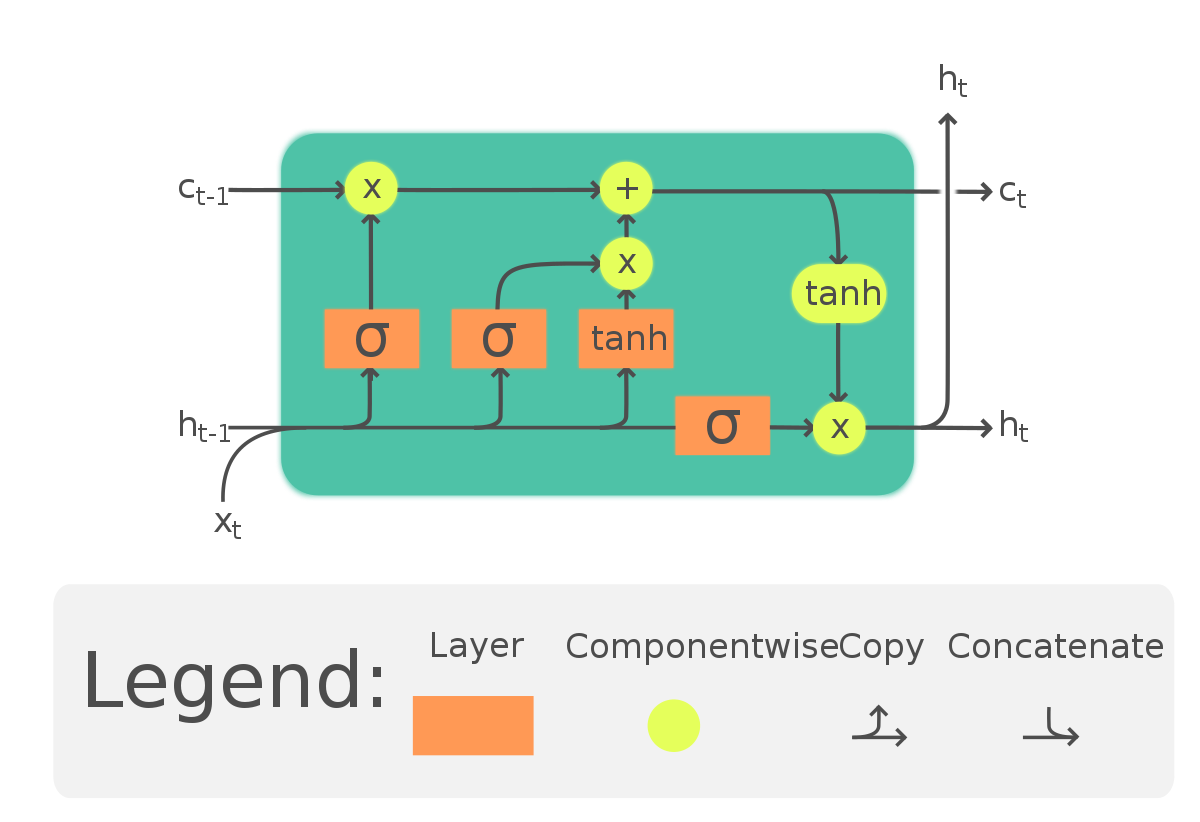

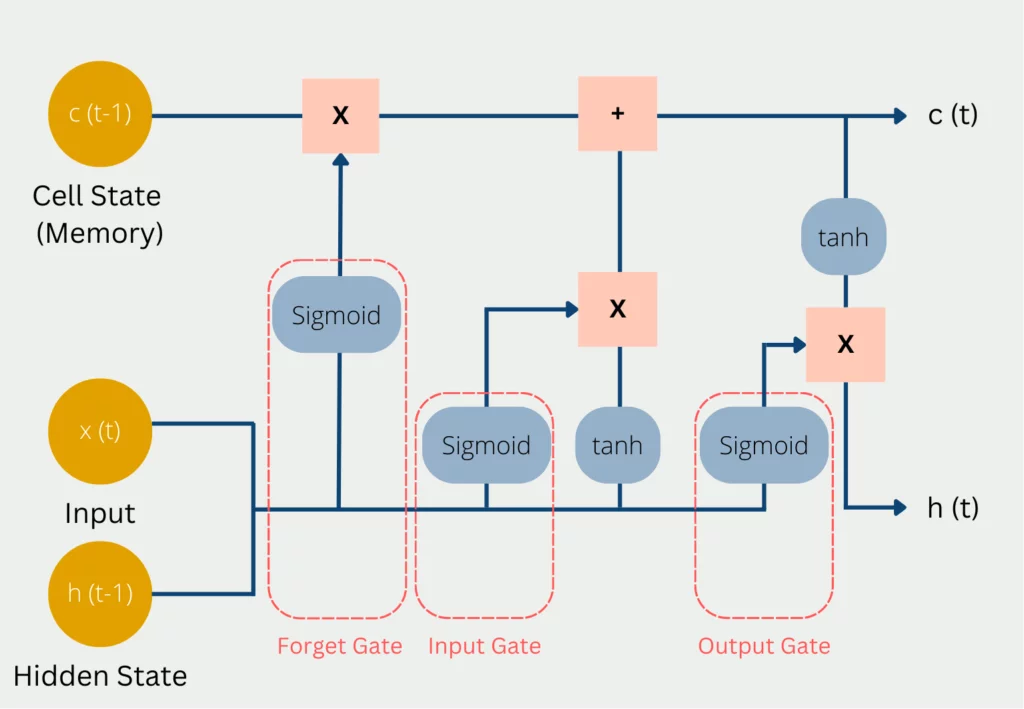

### Reading the stock market data

#### Read the stock data for Persistent Systems

In [1]:
import yfinance as yf
ticker = 'PERSISTENT.NS'
df = yf.download(tickers=ticker, period='1y')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-15,3320.0,3338.199951,3235.500000,3246.750000,3220.140625,239618
2022-09-16,3240.0,3264.000000,3150.000000,3161.100098,3135.192627,342597
2022-09-19,3181.0,3204.350098,3125.500000,3163.000000,3137.076904,142014
2022-09-20,3200.0,3250.000000,3172.199951,3180.199951,3154.135986,307344
2022-09-21,3178.0,3231.550049,3131.100098,3179.000000,3152.945801,248403


In [2]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-11,5974.000000,6035.000000,5915.000000,5936.149902,5936.149902,423473
2023-09-12,5988.299805,5988.299805,5826.450195,5839.899902,5839.899902,302359
2023-09-13,5786.799805,5826.500000,5714.049805,5779.500000,5779.500000,355274
2023-09-14,5815.000000,5952.600098,5774.000000,5939.149902,5939.149902,362520
2023-09-15,5986.000000,5986.000000,5894.049805,5954.450195,5954.450195,141262


### Visualize the closing price

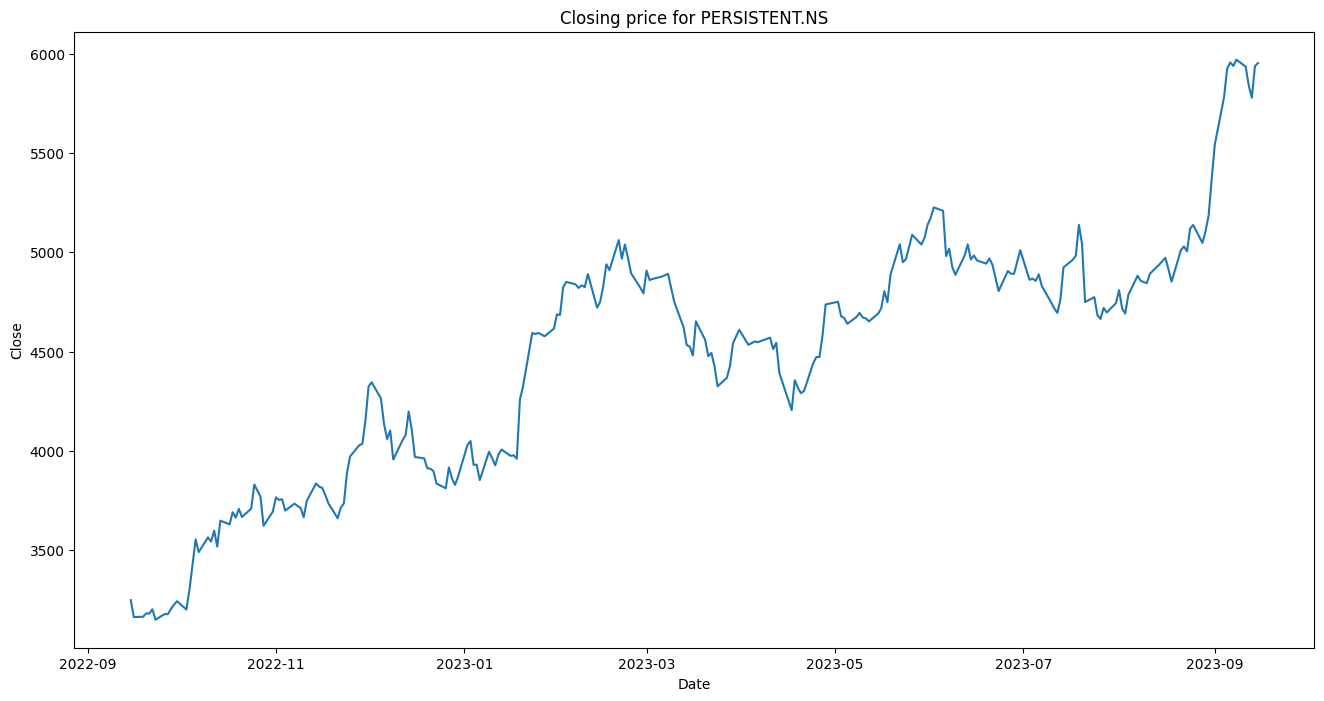

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title(f'Closing price for {ticker}')
plt.show()

### Get the target feature

In [4]:
Y = df[['Close']]

In [5]:
Y.head()

,Close
Date,
2022-09-15,3246.750000
2022-09-16,3161.100098
2022-09-19,3163.000000
2022-09-20,3180.199951
2022-09-21,3179.000000


In [6]:
Y.tail()

,Close
Date,
2023-09-11,5936.149902
2023-09-12,5839.899902
2023-09-13,5779.500000
2023-09-14,5939.149902
2023-09-15,5954.450195


### Use Min Max scaler to process Y data

In [7]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
y_scl = pd.DataFrame(scaler.fit_transform(Y),columns=Y.columns, index=Y.index)
y_scl

,Close
Date,
2022-09-15,0.034980
2022-09-16,0.004640
2022-09-19,0.005313
2022-09-20,0.011406
2022-09-21,0.010981
...,...
2023-09-11,0.987638
2023-09-12,0.953543
2023-09-13,0.932148


In [8]:
y_scl.shift(1)

,Close
Date,
2022-09-15,NaN
2022-09-16,0.034980
2022-09-19,0.004640
2022-09-20,0.005313
2022-09-21,0.011406
...,...
2023-09-11,1.000000
2023-09-12,0.987638
2023-09-13,0.953543


In [9]:
y_scl.shift(2)

,Close
Date,
2022-09-15,NaN
2022-09-16,NaN
2022-09-19,0.034980
2022-09-20,0.004640
2022-09-21,0.005313
...,...
2023-09-11,0.988930
2023-09-12,1.000000
2023-09-13,0.987638


### Get the lagged data

In [10]:
def get_lagged_data(df,lags):
    for i in range(lags):
        df[f'Lag{i+1}'] = df['Close'].shift(i+1)
    df.dropna(axis=0, inplace=True)  

In [11]:
get_lagged_data(df=y_scl, lags=3)

In [12]:
y_scl

,Close,Lag1,Lag2,Lag3
Date,,,,
2022-09-20,0.011406,0.005313,0.004640,0.034980
2022-09-21,0.010981,0.011406,0.005313,0.004640
2022-09-22,0.018615,0.010981,0.011406,0.005313
2022-09-23,0.000000,0.018615,0.010981,0.011406
2022-09-26,0.010184,0.000000,0.018615,0.010981
...,...,...,...,...
2023-09-11,0.987638,1.000000,0.988930,0.995183
2023-09-12,0.953543,0.987638,1.000000,0.988930
2023-09-13,0.932148,0.953543,0.987638,1.000000


### Seperate X and Y

In [13]:
x_pre = y_scl.drop(columns=['Close'])
y_pre = y_scl[['Close']]

In [14]:
x_pre.head()

,Lag1,Lag2,Lag3
Date,,,
2022-09-20,0.005313,0.004640,0.034980
2022-09-21,0.011406,0.005313,0.004640
2022-09-22,0.010981,0.011406,0.005313
2022-09-23,0.018615,0.010981,0.011406
2022-09-26,0.000000,0.018615,0.010981


In [15]:
y_pre.head()

,Close
Date,
2022-09-20,0.011406
2022-09-21,0.010981
2022-09-22,0.018615
2022-09-23,0.000000
2022-09-26,0.010184


### Train test split the data

In [16]:
n = int(0.8*len(y_pre))
n

197

In [17]:
xtrain, ytrain = x_pre[0:n+1], y_pre[0:n+1]
xtest, ytest = x_pre[n:], y_pre[n:]

In [18]:
xtrain.shape

(198, 3)

In [19]:
xtest.shape

(50, 3)

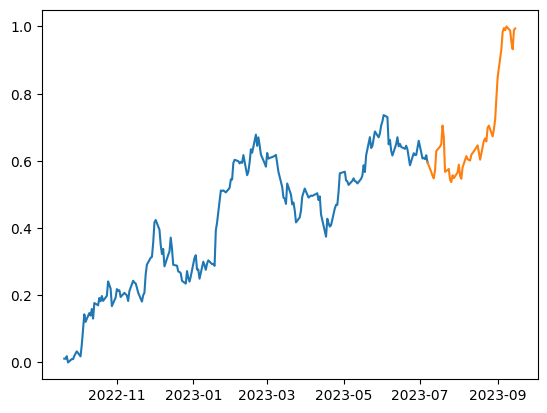

In [20]:
plt.plot(ytrain)
plt.plot(ytest)

### Create LSTM Neural Network

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [22]:
model = Sequential()

# Layer1 LSTM Layer
model.add(LSTM(64, input_shape=(xtrain.shape[1],1)))

# Layer2 Dense Layer
model.add(Dense(32,activation='relu'))

# Layer3 Dropout
model.add(Dropout(0.2))

# Layer4 Dense Layer
model.add(Dense(16,activation='relu'))

# Dropout
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='linear'))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 19521 (76.25 KB)
Trainable params: 19521 (

In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [25]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
5/5 [==============================] - 11s 367ms/step - loss: 0.1319 - mae: 0.3224 - val_loss: 0.2481 - val_mae: 0.4964
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0763 - mae: 0.2368 - val_loss: 0.1374 - val_mae: 0.3689
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0375 - mae: 0.1573 - val_loss: 0.0537 - val_mae: 0.2294
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0244 - mae: 0.1256 - val_loss: 0.0083 - val_mae: 0.0857
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0215 - mae: 0.1238 - val_loss: 0.0029 - val_mae: 0.0452
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0186 - mae: 0.1098 - val_loss: 0.0088 - val_mae: 0.0891
Epoch 7/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0179 - mae: 0.1125 - val_loss: 0.0174 - val_mae: 0.1286
Epoch 8/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0172 - mae: 0.

In [26]:
## Evaluate the model in train and test
model.evaluate(xtrain,ytrain)

7/7 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0335


[0.0018070066580548882, 0.033480700105428696]

In [27]:
model.evaluate(xtest, ytest)

2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - mae: 0.0638


[0.006229287479072809, 0.06384929269552231]

### Plot the learning curve

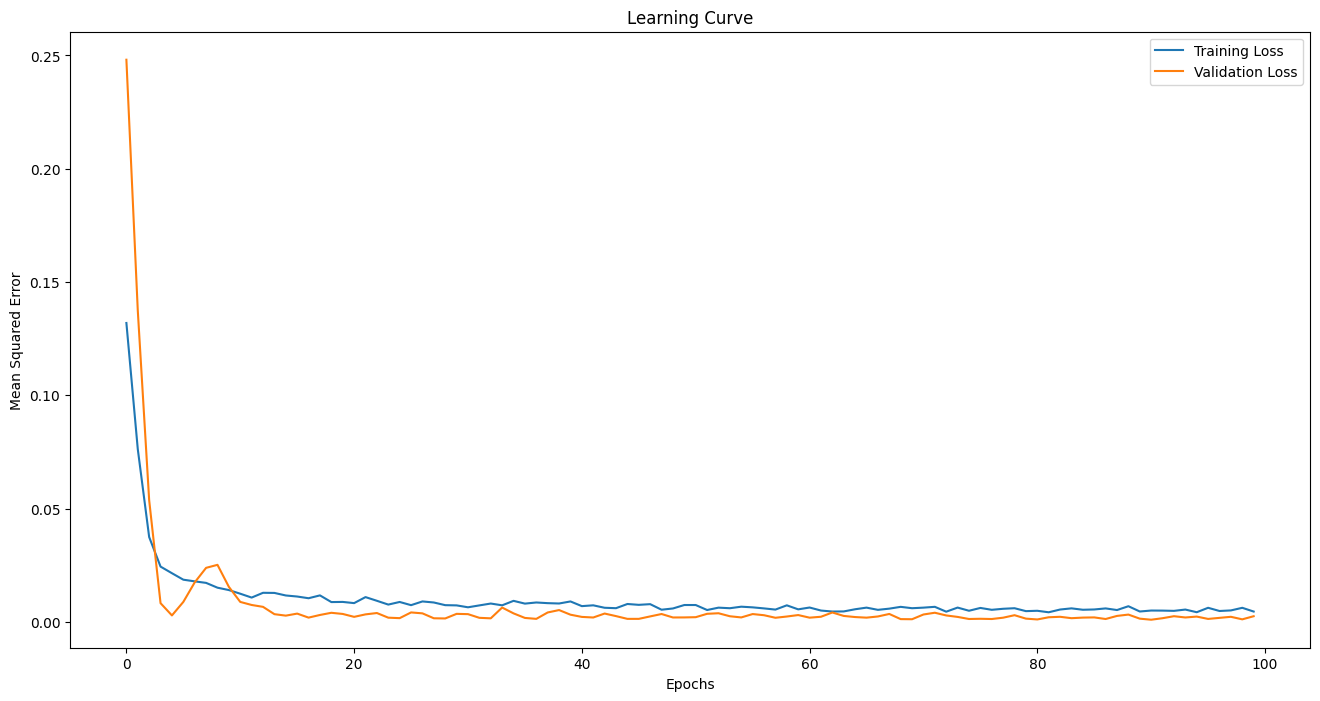

In [28]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Predicting the real values

In [29]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

2/2 [==============================] - 0s 6ms/step


In [30]:
ypred_tr[0:5]

array([[0.04083629],
       [0.03804787],
       [0.03881252],
       [0.0404039 ],
       [0.03903522]], dtype=float32)

In [31]:
ypred_tr_org = scaler.inverse_transform(ypred_tr)
ypred_ts_org = scaler.inverse_transform(ypred_ts)

In [32]:
ypred_ts_org[0:5]

array([[4771.1343],
       [4759.2417],
       [4724.015 ],
       [4676.439 ],
       [4640.9185]], dtype=float32)

In [33]:
ytrain_org = scaler.inverse_transform(ytrain)
ytest_org = scaler.inverse_transform(ytest)

In [34]:
ytest_org[0:5]

array([[4829.54980469],
       [4748.20019531],
       [4717.89990234],
       [4694.85009766],
       [4760.10009766]])

### Visualize training and testing data

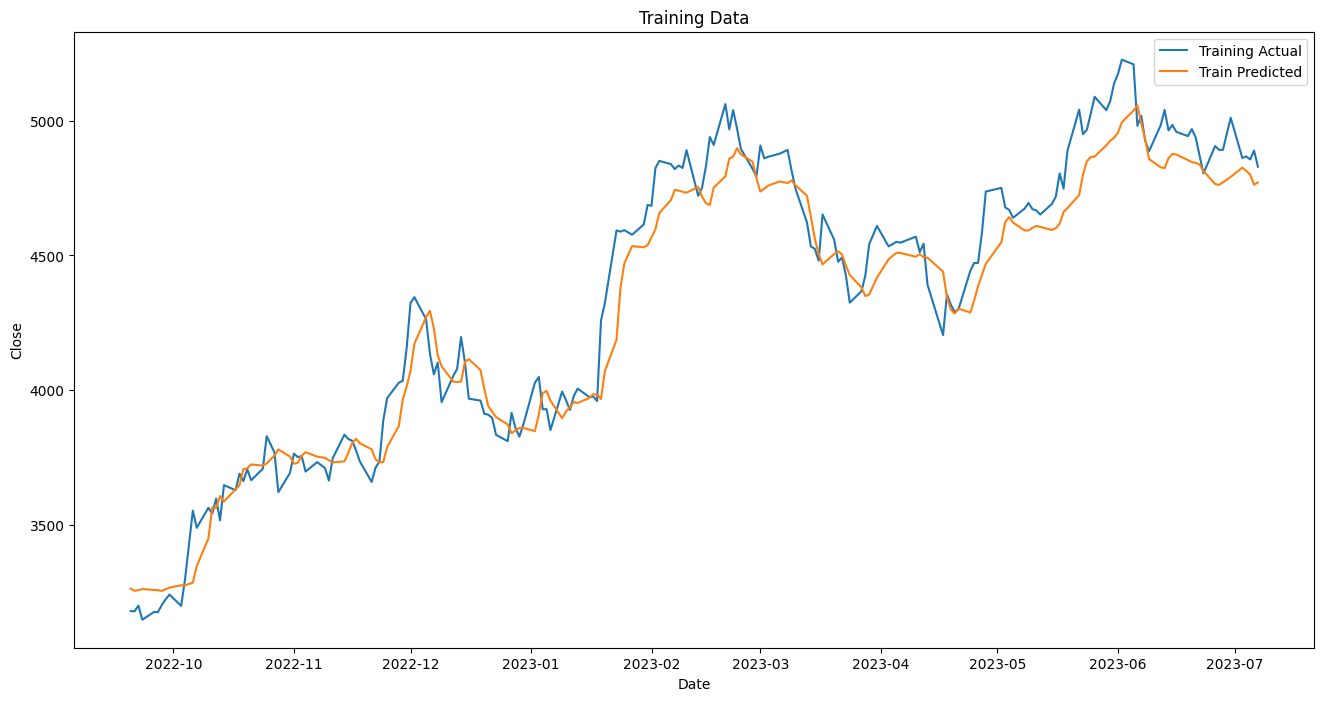

In [35]:
plt.figure(figsize=(16,8))
plt.plot(y_pre.index[0:n+1],ytrain_org,label='Training Actual')
plt.plot(y_pre.index[0:n+1],ypred_tr_org,label='Train Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Training Data')
plt.legend()
plt.show()

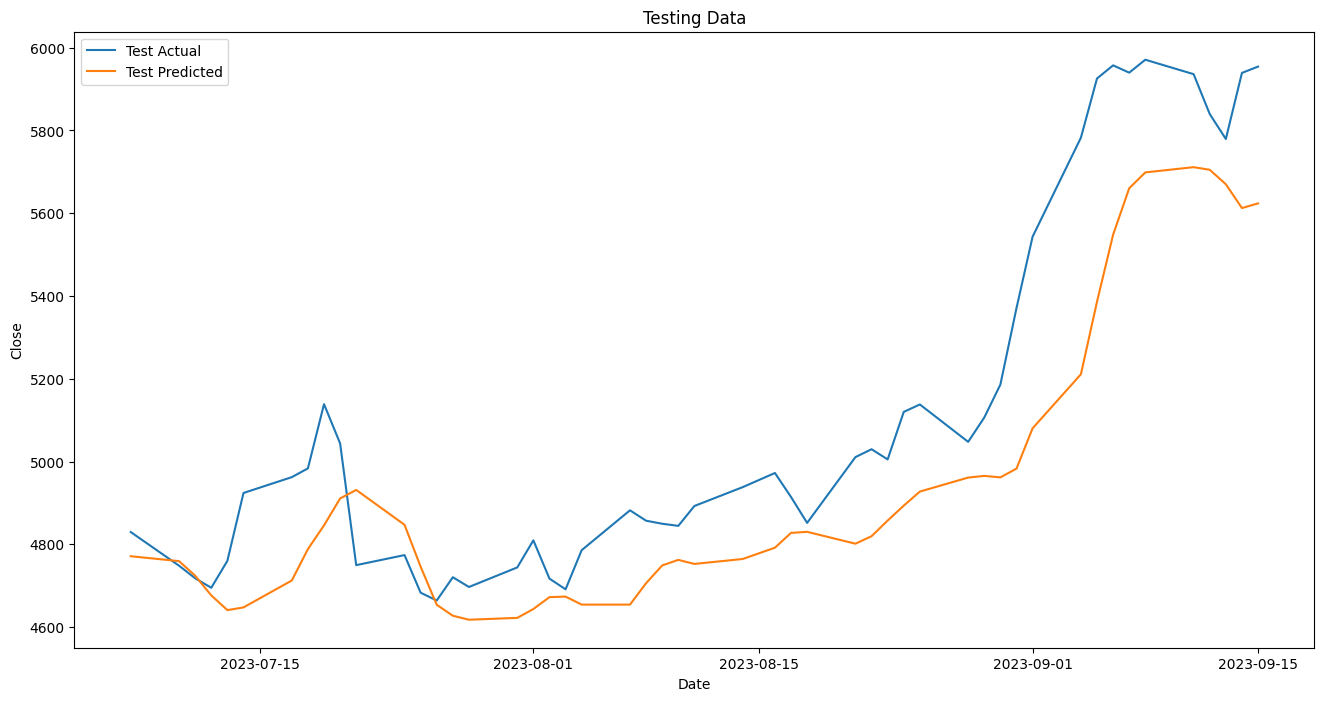

In [36]:
plt.figure(figsize=(16,8))
plt.plot(y_pre.index[n:],ytest_org,label='Test Actual')
plt.plot(y_pre.index[n:],ypred_ts_org,label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Testing Data')
plt.legend()
plt.show()

### Combining train and test plots

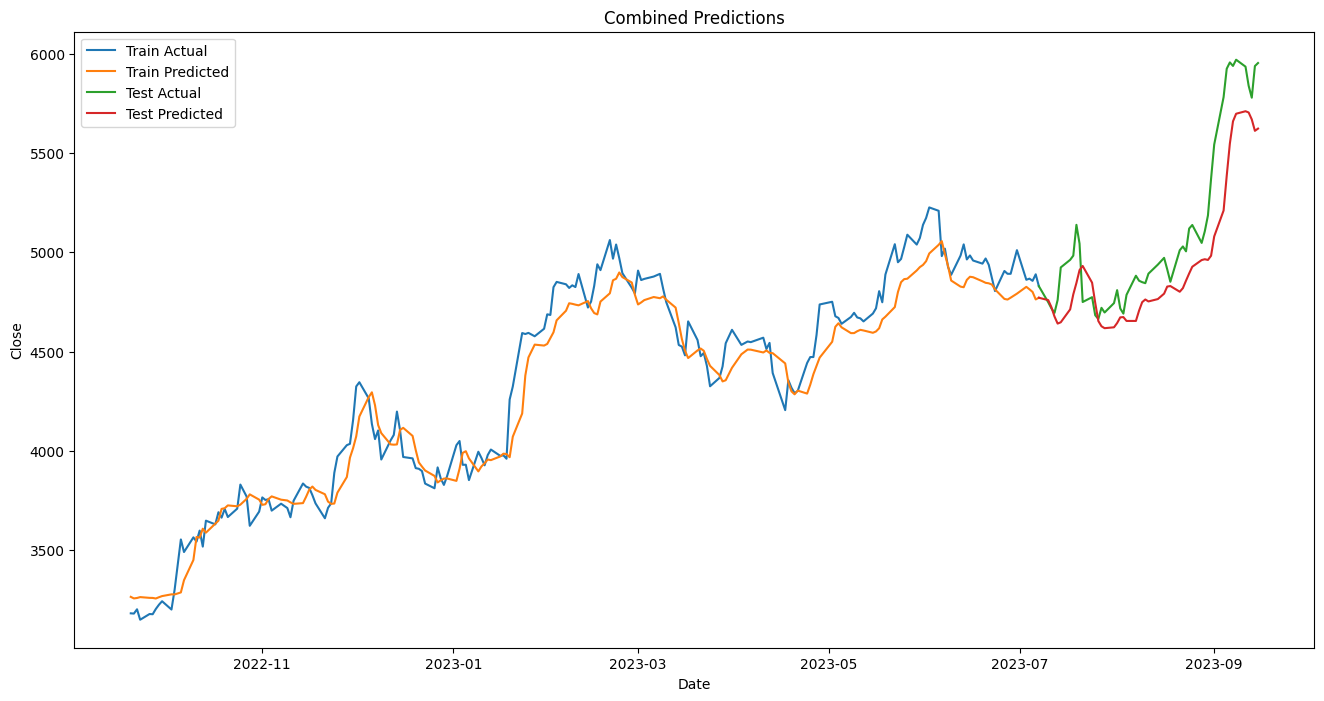

In [37]:
plt.figure(figsize=(16,8))
plt.plot(y_pre.index[0:n+1],ytrain_org,label='Train Actual')
plt.plot(y_pre.index[0:n+1],ypred_tr_org,label='Train Predicted')
plt.plot(y_pre.index[n:],ytest_org,label='Test Actual')
plt.plot(y_pre.index[n:],ypred_ts_org,label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Combined Predictions')
plt.legend()
plt.show()

### Save the model for future use

In [38]:
model.save('PersistentLSTM.keras')

In [39]:
### Project Done!:)